In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('laptop_details_data.csv')

In [3]:
df.head(10)

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99
5,HP 14in High Performance Laptop (AMD Ryzen 3 3...,HP,14 Inches,Ryzen 3 2300U,4 GB,Windows 10,4.3,Notebook,Silver,NaN,NaN,NaN,NaN,AMD Radeon Vega 3,128 GB,Integrated,NaN
6,"HP Envy 34” All-in-One Desktop, NVIDIA GeForce...",HP,34 Inches,Intel Core i7-11700,32 GB,Windows 11 Home,4.4,HP ENVY 34 inch All-in-One Desktop 34-c0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$2,167.00"
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,Intel Core i5-1135G7,16 GB,Windows 10 Pro,4.3,Latitude 3510,Black,NaN,NaN,NaN,NaN,Intel UHD Graphics,256 GB,Integrated,$818.00
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6 Inches,Ryzen 5,16 GB,Windows 11,4.5,Bravo 15 B5DD-243,Aluminum Black,NaN,NaN,NaN,NaN,NaN,512 GB,RX 5500M,$699.00
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3 Inches,Intel Core i9,64 GB,Windows 11 Pro,5.0,GE76-12UE,Titanium Blue,NaN,NaN,NaN,NaN,NaN,2 TB,Dedicated,"$2,449.99"


In [4]:
df.shape

(2843, 17)

In [5]:
df.isnull().sum()

Title                  0
Brand                 33
Screen_Size           87
CPU_Model            212
Ram                  132
Operating_System     120
Rating               560
Series               342
Color                734
Resolution          2661
Weight              2777
USB                 2808
Battery             2836
Graphics             780
Disk_size            595
Card_desc            208
Price                980
dtype: int64

In [6]:
df.describe()

,Rating,USB
count,2283.000000,35.000000
mean,4.252168,2.371429
std,0.556563,0.770245
min,1.000000,1.000000
25%,4.000000,2.000000
50%,4.300000,3.000000
75%,4.500000,3.000000
max,5.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2843 non-null   object 
 1   Brand             2810 non-null   object 
 2   Screen_Size       2756 non-null   object 
 3   CPU_Model         2631 non-null   object 
 4   Ram               2711 non-null   object 
 5   Operating_System  2723 non-null   object 
 6   Rating            2283 non-null   float64
 7   Series            2501 non-null   object 
 8   Color             2109 non-null   object 
 9   Resolution        182 non-null    object 
 10  Weight            66 non-null     object 
 11  USB               35 non-null     float64
 12  Battery           7 non-null      object 
 13  Graphics          2063 non-null   object 
 14  Disk_size         2248 non-null   object 
 15  Card_desc         2635 non-null   object 
 16  Price             1863 non-null   object 


## Data Cleaning

In [8]:
##features to select and clean = Parts of Title, Brand, Screen_Size, CPU_Model, Ram, Operating_System, Rating, Series, Graphics, Disk_size, Card_desc, Price

In [9]:
#Assuming MktMilesFlown, ODPairID, and ODPairID_freq doesnt matter
print(df.columns.tolist())

['Title', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Operating_System', 'Rating', 'Series', 'Color', 'Resolution', 'Weight', 'USB', 'Battery', 'Graphics', 'Disk_size', 'Card_desc', 'Price']


In [10]:
df=df[['Title','Brand','Screen_Size','CPU_Model','Ram','Operating_System','Rating','Series','Disk_size','Card_desc','Price']]
df

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Disk_size,Card_desc,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,256 GB,Integrated,$359.99
...,...,...,...,...,...,...,...,...,...,...,...
2838,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,$262.99
2839,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,$262.99
2840,Microsoft Surface Laptop Go 12.4in Touchscreen...,Microsoft,12.4 Inches,Core i5-1035G1,8 GB,Windows 10,4.5,Surface Laptop Go,128 GB,Integrated,NaN
2841,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,$262.99


In [11]:
df['Series'].unique()  #Check all features here

array(['Intel', 'Microsoft Surface', 'Surface Laptop', ...,
       'Chromebook Go', 'XE530QDA-KA1US', 'MS1ZO00001OB'], dtype=object)

In [12]:
# Title = Has mix of all
# Brand {strings of names} = nan vals , 'Artist Unknown' = Unknown = Artist Unkown --> nan   , HP = HP-Consumer Remarketing = HP Tuners
# Screen_size {floats + 'Inches'} =  (split + take first part as int) OR the string to int
# CPU_Model {strings} = nan vals
# Ram {float + 'GB'} = split + first part as int , nan vals
# Operating_System {strings} = nan vals
# Rating {float} = [0,5] , nan vals
# Series {string} = nan vals
# Disk_size {float + 'GB'} = split + first part as int (and convert each val)
# Card_desc {string} = Integrated or Not
# Price = OUTPUT

In [13]:
df['Price($)']=df['Price'].str.split('$').str.get(1)
df.drop(['Price'], axis=1, inplace=True)
df

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Disk_size,Card_desc,Price($)
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,256 GB,Integrated,359.99
...,...,...,...,...,...,...,...,...,...,...,...
2838,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99
2839,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99
2840,Microsoft Surface Laptop Go 12.4in Touchscreen...,Microsoft,12.4 Inches,Core i5-1035G1,8 GB,Windows 10,4.5,Surface Laptop Go,128 GB,Integrated,NaN
2841,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99


In [14]:
df=df[~df[['Price($)','Title']].isna().any(axis=1)]
df

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Disk_size,Card_desc,Price($)
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,256 GB,Integrated,359.99
6,"HP Envy 34” All-in-One Desktop, NVIDIA GeForce...",HP,34 Inches,Intel Core i7-11700,32 GB,Windows 11 Home,4.4,HP ENVY 34 inch All-in-One Desktop 34-c0010,NaN,NaN,"2,167.00"
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,Intel Core i5-1135G7,16 GB,Windows 10 Pro,4.3,Latitude 3510,256 GB,Integrated,818.00
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6 Inches,Ryzen 5,16 GB,Windows 11,4.5,Bravo 15 B5DD-243,512 GB,RX 5500M,699.00
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3 Inches,Intel Core i9,64 GB,Windows 11 Pro,5.0,GE76-12UE,2 TB,Dedicated,"2,449.99"
...,...,...,...,...,...,...,...,...,...,...,...
2837,"Microsoft Surface Laptop Go 12.4"" Light Weight...",Microsoft,12.4 Inches,Intel Core i5,64 GB,Windows 10 Pro,3.0,NaN,64 GB,Integrated,419.99
2838,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99
2839,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99
2841,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99


In [15]:
def brandcleaner(text):
    if text=='Unknown' or text=='Laptop' or text=='Best Notebooks':
        return 'SAMSUNG'
    elif text=='HP Tuners':
        return 'HP'
    else:
        return text
        
df['Brand']=df['Brand'].apply(brandcleaner)

In [16]:
brmiss=df[df['Brand'].isna()]

In [17]:
brmiss['Brand']=brmiss['Title'].str.split(' ').str.get(0)
brmiss.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Disk_size,Card_desc,Price($)
730,"Toughbook CF-191MYAX1M 10.1"" LED Intel Core i5...",Toughbook,10.1 Inches,Core i5,4 GB,Windows 7 Professional,NaN,Cf-19myax1m,500 GB,Integrated,"2,950.00"
786,Panasonic Toughbook CF-53JJCZY1M 14 LED Notebo...,Panasonic,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,"1,899.00"
919,GIGABYTE Ultra Compact Mini PC/Intel UHD Graph...,GIGABYTE,NaN,NaN,NaN,NaN,4.1,NaN,NaN,NaN,187.57
1100,Generic 11.6 inches HD Screen Compatible with ...,Generic,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,28.50
1106,"Generic 15.6"" HD Screen Compatible with Lenovo...",Generic,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,55.00


In [18]:
brmiss['Screen_Size']=brmiss['Title'].str.extract(r'(\d{2}\.\d{1})\"')
brmiss.head()

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Disk_size,Card_desc,Price($)
730,"Toughbook CF-191MYAX1M 10.1"" LED Intel Core i5...",Toughbook,10.1,Core i5,4 GB,Windows 7 Professional,NaN,Cf-19myax1m,500 GB,Integrated,"2,950.00"
786,Panasonic Toughbook CF-53JJCZY1M 14 LED Notebo...,Panasonic,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,"1,899.00"
919,GIGABYTE Ultra Compact Mini PC/Intel UHD Graph...,GIGABYTE,NaN,NaN,NaN,NaN,4.1,NaN,NaN,NaN,187.57
1100,Generic 11.6 inches HD Screen Compatible with ...,Generic,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,28.50
1106,"Generic 15.6"" HD Screen Compatible with Lenovo...",Generic,15.6,NaN,NaN,NaN,3.8,NaN,NaN,NaN,55.00


In [19]:
brmiss.iloc[1]

Title               Panasonic Toughbook CF-53JJCZY1M 14 LED Notebo...
Brand                                                       Panasonic
Screen_Size                                                       NaN
CPU_Model                                                         NaN
Ram                                                               NaN
Operating_System                                                  NaN
Rating                                                            5.0
Series                                                            NaN
Disk_size                                                         NaN
Card_desc                                                         NaN
Price($)                                                     1,899.00
Name: 786, dtype: object

In [20]:
df['CPU_Model'].unique()

array(['Core i5', 'Intel Core i7-11700', 'Intel Core i5-1135G7',
       'Ryzen 5', 'Intel Core i9', 'Core i7 8750H', 'Intel Core i7',
       'Core i7', 'AMD Ryzen 9 5900X', 'Core i9', 'Corei5-10300H', nan,
       'Celeron N4020', 'Core i7 Family', 'Intel Core i5', 'Ryzen 7',
       'ARM 7100', 'Core i3', 'Core I7 11800H', 'Corei7-10750H',
       'AMD Ryzen 7', 'Core i5 Family', 'Corei7-9750H', 'Ryzen 5 5500U',
       'Core i7-10510U', 'Corei7-1065G7', 'Xeon Platinum 8160M',
       'Ryzen 9', 'Core I9 12900H', 'AMD Ryzen 5 5500U', 'Celeron',
       'Celeron N', 'AMD A Series', 'Celeron N4000', 'Apple M1',
       'MediaTek MT8183', 'Ryzen 3 3350U', 'Core i7 Extreme', 'AMD A6',
       'Core i5-3340s', '8032', 'Pentium', 'Core I3 1115G4',
       'Intel Core i3', 'Ryzen 7 5800U', 'Unknown', 'AMD Ryzen 5 5600X',
       'Intel Mobile CPU', 'Intel Atom', 'MediaTek_MT8127', 'AMD A4',
       'Celeron 2955U', 'Intel Core i7-1165G7', 'Celeron N3350',
       'Celeron 3205U', 'Ryzen 3 2300U', 'Celer

In [21]:
cpu_pattern = r'(Intel\s*i\d|Core\s*i\d|Ryzen\s*\d|Radeon\s*R\d|Exynos\s*\d)'
miss=df[df['CPU_Model'].isna()]
df.loc[miss.index,'CPU_Model'] = df['Title'].str.extract(cpu_pattern)

In [22]:
df.loc[brmiss.index,'Ram']=brmiss['Title'].str.extract(r'(\d{1,2}GB)')
df

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Disk_size,Card_desc,Price($)
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,256 GB,Integrated,359.99
6,"HP Envy 34” All-in-One Desktop, NVIDIA GeForce...",HP,34 Inches,Intel Core i7-11700,32 GB,Windows 11 Home,4.4,HP ENVY 34 inch All-in-One Desktop 34-c0010,NaN,NaN,"2,167.00"
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,Intel Core i5-1135G7,16 GB,Windows 10 Pro,4.3,Latitude 3510,256 GB,Integrated,818.00
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6 Inches,Ryzen 5,16 GB,Windows 11,4.5,Bravo 15 B5DD-243,512 GB,RX 5500M,699.00
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3 Inches,Intel Core i9,64 GB,Windows 11 Pro,5.0,GE76-12UE,2 TB,Dedicated,"2,449.99"
...,...,...,...,...,...,...,...,...,...,...,...
2837,"Microsoft Surface Laptop Go 12.4"" Light Weight...",Microsoft,12.4 Inches,Intel Core i5,64 GB,Windows 10 Pro,3.0,NaN,64 GB,Integrated,419.99
2838,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99
2839,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99
2841,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4 Inches,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99


In [23]:
df['Brand'].isna().sum()

21

In [24]:
df['Screen_Size']=df['Screen_Size'].str.split().str.get(0)

In [25]:
df=df.dropna(subset=['Price($)','CPU_Model','Brand','Screen_Size','Ram','Disk_size','Operating_System'])
df['Price($)']=df['Price($)'].apply(lambda x: x.replace(",",""))
df['Price($)']=df['Price($)'].astype(float)
df

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Disk_size,Card_desc,Price($)
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,256 GB,Integrated,359.99
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,Intel Core i5-1135G7,16 GB,Windows 10 Pro,4.3,Latitude 3510,256 GB,Integrated,818.00
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,Ryzen 5,16 GB,Windows 11,4.5,Bravo 15 B5DD-243,512 GB,RX 5500M,699.00
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,Intel Core i9,64 GB,Windows 11 Pro,5.0,GE76-12UE,2 TB,Dedicated,2449.99
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,Core i7 8750H,16 GB,Windows 10 Home,5.0,17 R5,1 TB,Dedicated,1799.95
...,...,...,...,...,...,...,...,...,...,...,...
2837,"Microsoft Surface Laptop Go 12.4"" Light Weight...",Microsoft,12.4,Intel Core i5,64 GB,Windows 10 Pro,3.0,NaN,64 GB,Integrated,419.99
2838,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99
2839,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99
2841,"Microsoft Surface Laptop Go 12.4"" Touchscreen ...",Microsoft,12.4,Core i5-1035G1,4 GB,Windows 10 Pro,4.2,Surface Go,64 GB,Integrated,262.99


In [26]:
mean_rating=df.Rating.mean()
df['Rating']=df['Rating'].fillna(mean_rating)

In [27]:
df.Disk_size.isna().sum()

0

In [28]:
df['Screen_Size']=df['Screen_Size'].str.split(' ').str.get(0)
df['Screen_Size']=df['Screen_Size'].astype(float)
df['Ram(GB)']=df['Ram'].str.split(' ').str.get(0)
df['Ram(GB)']=df['Ram(GB)'].astype(float)

In [29]:
def convert_gb(size_str):
    match = re.match(r'(\d+\.?\d*)\s*(GB|TB)?', size_str)
    if not match:
        return None
    value = float(match.group(1))
    unit = match.group(2) or 'GB'
    if unit == 'TB':
        return value * 1024
    elif unit == 'GB':
        return value
    else:
        return value

df['Disk_Size(GB)'] = df['Disk_size'].apply(convert_gb)

In [30]:
df.drop(['Ram','Disk_size'],inplace=True,axis=1)

In [31]:
def categorize_cpu_model(text):
    text = text.lower()
    if 'i9' in text:
        return 'i9'
    elif 'i7' in text:
        return 'i7'
    elif 'i5' in text:
        return 'i5'
    elif 'ryzen' in text:
        return 'Ryzen'
    elif 'celeron' in text:
        return 'Celeron'
    elif 'i3' in text:
        return 'i3'
    else:
        return 'Other'

df['CPU'] = df['CPU_Model'].apply(categorize_cpu_model)

In [32]:
df.drop(['CPU_Model'],inplace=True,axis=1)

In [33]:
df.Series.unique()

array(['Surface Laptop Go', 'Latitude 3510', 'Bravo 15 B5DD-243',
       'GE76-12UE', '17 R5', 'Pulse GL76 12UGK', 'Raider GE76 12UH',
       'G533ZM-ES93', 'Titan GT77 12UGS', 'A5 X1-CUS2130SB', 'Toughbook',
       nan, 'Raider GE66 12UHS', 'GS76 Stealth 11UG-653',
       'Creator Z17 A12UHT', 'CreatorPro M16 A12UJS',
       'MSI GF63 Thin Gaming', 'Raider GE66 12UGS-238', 'CloudBook 14"',
       'WF76 11UJ-299', 'Prestige 14 A12SC', 'Creator Z16 A12UET',
       'Pulse GL76 12UEK', 'Prestige 14 A12UC', 'Prestige 14Evo A12M',
       'Summit E16Flip A12UCT', 'GS66 Stealth 10SFS', 'Summit E14 Evo',
       'XPG Xenia 14', 'Summit E14 Flip Evo', 'MacBook Pro',
       'Sword 17 A11UD-642', 'Pulse GL66 11UCK-1249', 'GF76 12UE',
       'WS76 11UK-470', 'Creator Z16 A11UET-254', 'Aspire 5',
       'Creator M16 A12UEV-468', 'GE76 Raider', 'Modern 15 A11MU-652',
       'Katana GF66 12UGSOK', 'GE76 12UE', 'Vector GP76 12UE-270',
       'MSI Katana GF76 Laptop', 'GF65 Thin', 'M16 A12UE',
       'P

In [34]:
df.drop(['Series','Card_desc'],inplace=True,axis=1)

In [35]:
df.isna().sum()

Title               0
Brand               0
Screen_Size         0
Operating_System    0
Rating              0
Price($)            0
Ram(GB)             0
Disk_Size(GB)       0
CPU                 0
dtype: int64

In [36]:
df.describe()

,Screen_Size,Rating,Price($),Ram(GB),Disk_Size(GB)
count,1423.000000,1423.000000,1423.000000,1423.000000,1.423000e+03
mean,15.081167,4.284559,1010.022073,15.241743,1.319715e+03
std,3.093600,0.479301,949.125549,14.563862,2.713598e+04
min,10.100000,1.000000,38.980000,1.000000,1.000000e-02
25%,14.000000,4.200000,369.000000,8.000000,1.600000e+02
50%,15.600000,4.300000,679.000000,16.000000,5.120000e+02
75%,15.600000,4.500000,1346.405000,16.000000,1.024000e+03
max,116.000000,5.000000,6599.000000,128.000000,1.024000e+06


In [37]:
df.shape

(1423, 9)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 4 to 2842
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1423 non-null   object 
 1   Brand             1423 non-null   object 
 2   Screen_Size       1423 non-null   float64
 3   Operating_System  1423 non-null   object 
 4   Rating            1423 non-null   float64
 5   Price($)          1423 non-null   float64
 6   Ram(GB)           1423 non-null   float64
 7   Disk_Size(GB)     1423 non-null   float64
 8   CPU               1423 non-null   object 
dtypes: float64(5), object(4)
memory usage: 111.2+ KB


In [39]:
df.head()

,Title,Brand,Screen_Size,Operating_System,Rating,Price($),Ram(GB),Disk_Size(GB),CPU
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,Windows 11 Pro,3.9,359.99,4.0,256.0,i5
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,Windows 10 Pro,4.3,818.00,16.0,256.0,i5
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,Windows 11,4.5,699.00,16.0,512.0,Ryzen
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,Windows 11 Pro,5.0,2449.99,64.0,2048.0,i9
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,Windows 10 Home,5.0,1799.95,16.0,1024.0,i7


In [40]:
df.to_csv('laptop_data_cleaned')

## Feature Engineering

In [41]:
df=pd.read_csv('laptop_data_cleaned')

In [42]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [43]:
df.head()

,Title,Brand,Screen_Size,Operating_System,Rating,Price($),Ram(GB),Disk_Size(GB),CPU
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,Windows 11 Pro,3.9,359.99,4.0,256.0,i5
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,Windows 10 Pro,4.3,818.00,16.0,256.0,i5
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,Windows 11,4.5,699.00,16.0,512.0,Ryzen
3,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,Windows 11 Pro,5.0,2449.99,64.0,2048.0,i9
4,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,Windows 10 Home,5.0,1799.95,16.0,1024.0,i7


In [44]:
df.Brand.unique()

array(['Microsoft', 'Dell', 'MSI', 'Alienware', 'EXCaliberPC', 'GIGABYTE',
       'Panasonic', 'Packard Bell', 'Apple', 'Acer', 'Lenovo', 'VGKE',
       'Jumper', 'HP', 'Toughbook', 'ASUS', 'BiTECOOL', 'CHUWI', 'WAKST',
       'ECOHERO', 'Fusion5', 'TECLAST', 'Bmax', 'LG', 'SAMSUNG',
       'HYUNDAI', 'Broage', 'Generic', 'Razer', 'LincPlus', 'DERE',
       'REPOWER REPAIR REFURBISH REUSE', 'Carlisle Paddles', 'OTVOC',
       'Thomson', 'Coolby'], dtype=object)

In [45]:
df.Brand = df.Brand.apply(lambda x : x.strip())
brand_stats=df.groupby('Brand')['Brand'].agg('count').sort_values(ascending=False)
brand_stats

Brand
ASUS                              258
HP                                253
Acer                              179
MSI                               152
Dell                              149
SAMSUNG                            77
Alienware                          62
LG                                 59
EXCaliberPC                        55
Microsoft                          46
Lenovo                             27
Panasonic                          22
Toughbook                          19
CHUWI                              12
GIGABYTE                           11
Packard Bell                        6
Fusion5                             5
LincPlus                            4
Apple                               4
ECOHERO                             2
TECLAST                             2
Generic                             2
Bmax                                2
BiTECOOL                            2
Razer                               2
REPOWER REPAIR REFURBISH REUSE      1
Thomso

In [46]:
brand_less10=brand_stats[brand_stats<=10]
df.Brand=df.Brand.apply(lambda x: 'Other' if x in brand_less10 else x)
df.Brand.unique()

array(['Microsoft', 'Dell', 'MSI', 'Alienware', 'EXCaliberPC', 'GIGABYTE',
       'Panasonic', 'Other', 'Acer', 'Lenovo', 'HP', 'Toughbook', 'ASUS',
       'CHUWI', 'LG', 'SAMSUNG'], dtype=object)

In [47]:
df.Operating_System.unique()
# Since brand and operating systems are correlated(except the possibility of multiple OS in one device, which has less value counts)
# Thus, we just drop operating_system, since CPU gives a better idea of price too 

array(['Windows 11 Pro', 'Windows 10 Pro', 'Windows 11',
       'Windows 10 Home', 'Windows 11 Home', 'Windows 7', 'Windows 10',
       'MacOS 12 Monterey', 'Win 10 PRO /Free upgrade to Win 11',
       'Windows 11 Home (S Mode)', 'Microsoft Windows 11 Professional',
       'Microsoft Windows 10 Professional (64-Bit)',
       'Microsoft Windows 10 Professional (64bit)',
       'Win 10 Pro / Free upgrade to Win 11', 'Microsoft Windows 11 Home',
       'Win 10 Multi-language /Free upgrade to Win 11', 'Chrome OS',
       'Windows 10 S', 'Windows 11 Home in S Mode', 'Windows 11 S',
       'Windows 7 Professional', 'Windows', 'Windows 8 Professional',
       'Windows 7 Professional, Windows 7', 'Windows 8 Pro, Windows 7',
       'Windows 11 Home S Mode', 'Win 10 PRO Free upgrade to Win 11',
       'Windows 10 Home, Windows 11, Windows 10', 'Windows 11 in S mode',
       'Mac OS', 'Windows 8', 'Microsoft Windows 10 (64-Bit)',
       'Windows 7 Home Premium 64-bit', 'Windows 10 64bits Pro',
  

In [48]:
df.drop(['Operating_System','Title'],inplace=True,axis=1)
df

,Brand,Screen_Size,Rating,Price($),Ram(GB),Disk_Size(GB),CPU
0,Microsoft,12.4,3.9,359.99,4.0,256.0,i5
1,Dell,15.6,4.3,818.00,16.0,256.0,i5
2,MSI,15.6,4.5,699.00,16.0,512.0,Ryzen
3,MSI,17.3,5.0,2449.99,64.0,2048.0,i9
4,Alienware,17.3,5.0,1799.95,16.0,1024.0,i7
...,...,...,...,...,...,...,...
1418,Microsoft,12.4,3.0,419.99,64.0,64.0,i5
1419,Microsoft,12.4,4.2,262.99,4.0,64.0,i5
1420,Microsoft,12.4,4.2,262.99,4.0,64.0,i5
1421,Microsoft,12.4,4.2,262.99,4.0,64.0,i5


In [49]:
usd_to_inr = 86.31


def convert_to_inr(price):
    price_inr = price * usd_to_inr
    return price_inr

df['Price(INR)'] = df['Price($)'].apply(convert_to_inr)
df.drop('Price($)',axis=1,inplace=True)
df

,Brand,Screen_Size,Rating,Ram(GB),Disk_Size(GB),CPU,Price(INR)
0,Microsoft,12.4,3.9,4.0,256.0,i5,31070.7369
1,Dell,15.6,4.3,16.0,256.0,i5,70601.5800
2,MSI,15.6,4.5,16.0,512.0,Ryzen,60330.6900
3,MSI,17.3,5.0,64.0,2048.0,i9,211458.6369
4,Alienware,17.3,5.0,16.0,1024.0,i7,155353.6845
...,...,...,...,...,...,...,...
1418,Microsoft,12.4,3.0,64.0,64.0,i5,36249.3369
1419,Microsoft,12.4,4.2,4.0,64.0,i5,22698.6669
1420,Microsoft,12.4,4.2,4.0,64.0,i5,22698.6669
1421,Microsoft,12.4,4.2,4.0,64.0,i5,22698.6669


## Outlier Removal

In [50]:
df['Price_per_size']=df['Price(INR)']/df['Screen_Size']
df['Price_per_ram']=df['Price(INR)']/df['Ram(GB)']
df['Price_per_disk_size']=df['Price(INR)']/df['Disk_Size(GB)']
df

,Brand,Screen_Size,Rating,Ram(GB),Disk_Size(GB),CPU,Price(INR),Price_per_size,Price_per_ram,Price_per_disk_size
0,Microsoft,12.4,3.9,4.0,256.0,i5,31070.7369,2505.704589,7767.684225,121.370066
1,Dell,15.6,4.3,16.0,256.0,i5,70601.5800,4525.742308,4412.598750,275.787422
2,MSI,15.6,4.5,16.0,512.0,Ryzen,60330.6900,3867.351923,3770.668125,117.833379
3,MSI,17.3,5.0,64.0,2048.0,i9,211458.6369,12223.042595,3304.041202,103.251288
4,Alienware,17.3,5.0,16.0,1024.0,i7,155353.6845,8979.981763,9709.605281,151.712583
...,...,...,...,...,...,...,...,...,...,...
1418,Microsoft,12.4,3.0,64.0,64.0,i5,36249.3369,2923.333621,566.395889,566.395889
1419,Microsoft,12.4,4.2,4.0,64.0,i5,22698.6669,1830.537653,5674.666725,354.666670
1420,Microsoft,12.4,4.2,4.0,64.0,i5,22698.6669,1830.537653,5674.666725,354.666670
1421,Microsoft,12.4,4.2,4.0,64.0,i5,22698.6669,1830.537653,5674.666725,354.666670


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Price_per_size', 'Price_per_disk_size', 'Price_per_ram']])
df['avg_price_metric'] = scaled_data.mean(axis=1)
df.drop(['Price_per_size', 'Price_per_disk_size', 'Price_per_ram'], axis=1, inplace=True)

In [52]:
def remove_outliers(df,metric,tolerance=1):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("Brand"):
        mean=np.mean(subdf[metric])
        standev=np.std(subdf[metric])
        reduced_df=subdf[(subdf[metric]>(mean-tolerance*standev)) & (subdf[metric]<=(mean+tolerance*standev))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_red=remove_outliers(df,'avg_price_metric')
df_red=remove_outliers(df_red,'Ram(GB)',2)
df_red=remove_outliers(df_red,'Disk_Size(GB)',2)
df=remove_outliers(df_red,'Screen_Size',2)
df.drop('avg_price_metric',inplace=True,axis=1)
df.shape

(979, 7)

## Data Visualisation

In [53]:
def feature_plot(df, feature_column, target_column='Price(INR)', brand_column='Brand'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=feature_column, 
        y=target_column,
        hue=brand_column,
        data=df,
        alpha=0.4,
        edgecolor='black',
        palette='viridis'
    )
    
    plt.xlabel(f'{feature_column}')
    plt.ylabel(f'{target_column}')
    plt.title(f'{feature_column} vs. {target_column} by Brand')
    plt.legend(title=brand_column)  # Explicit legend with title
    plt.show()

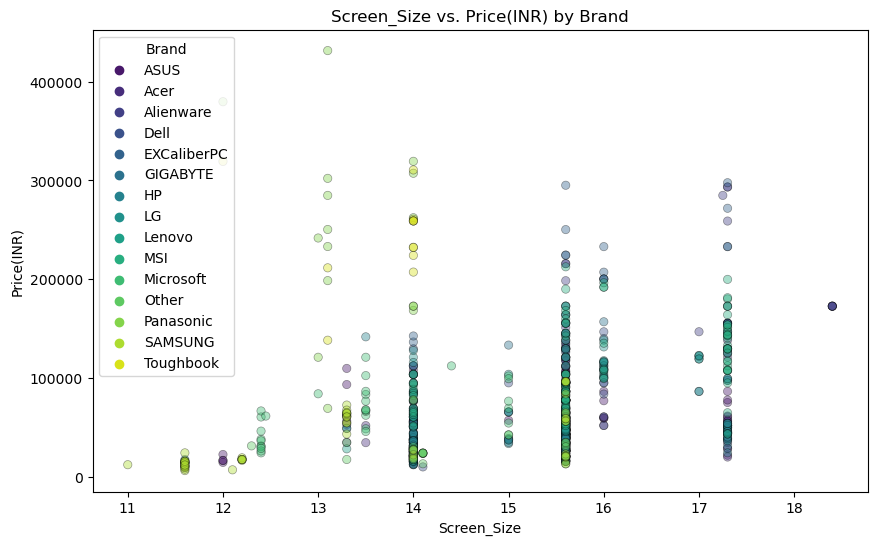

In [54]:
feature_plot(df,'Screen_Size')

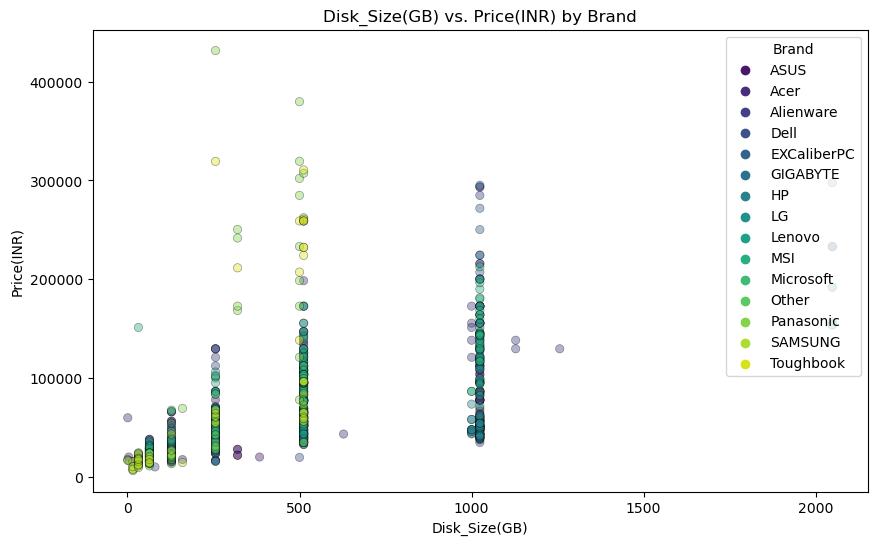

In [55]:
feature_plot(df,'Disk_Size(GB)')

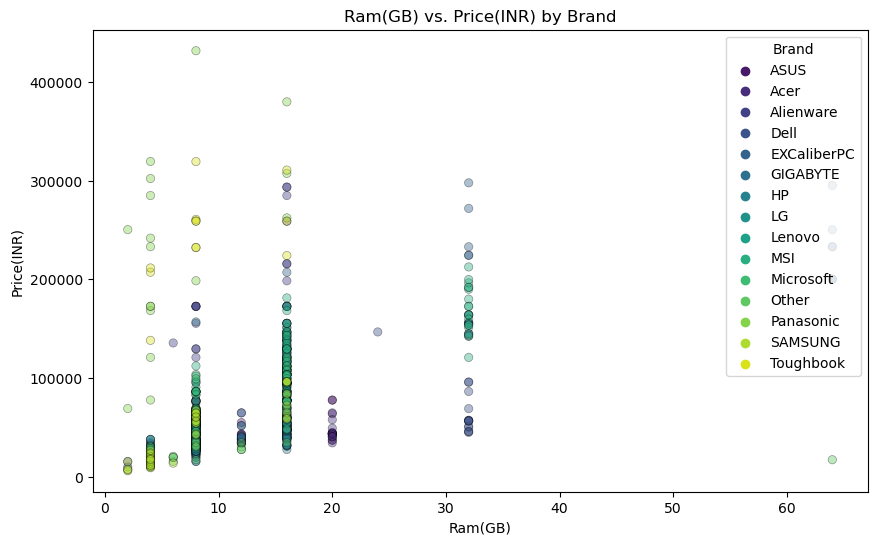

In [56]:
feature_plot(df,'Ram(GB)')

In [57]:
def plot_categorical(df, categorical_col, continuous_col='Price(INR)'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=categorical_col, y=continuous_col, palette='viridis')
    plt.title(f'{categorical_col} vs {continuous_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(continuous_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

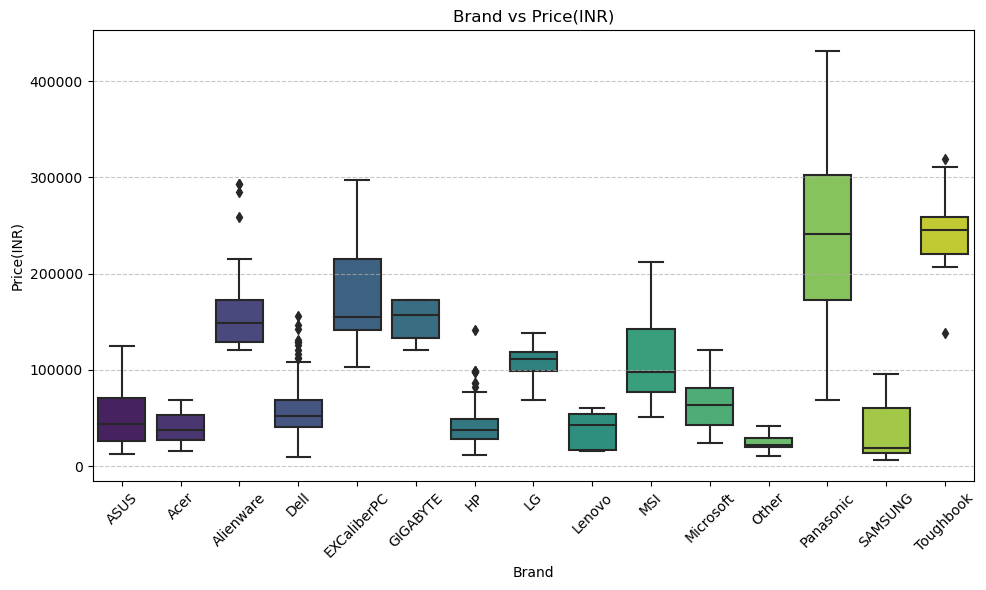

In [58]:
plot_categorical(df,'Brand')

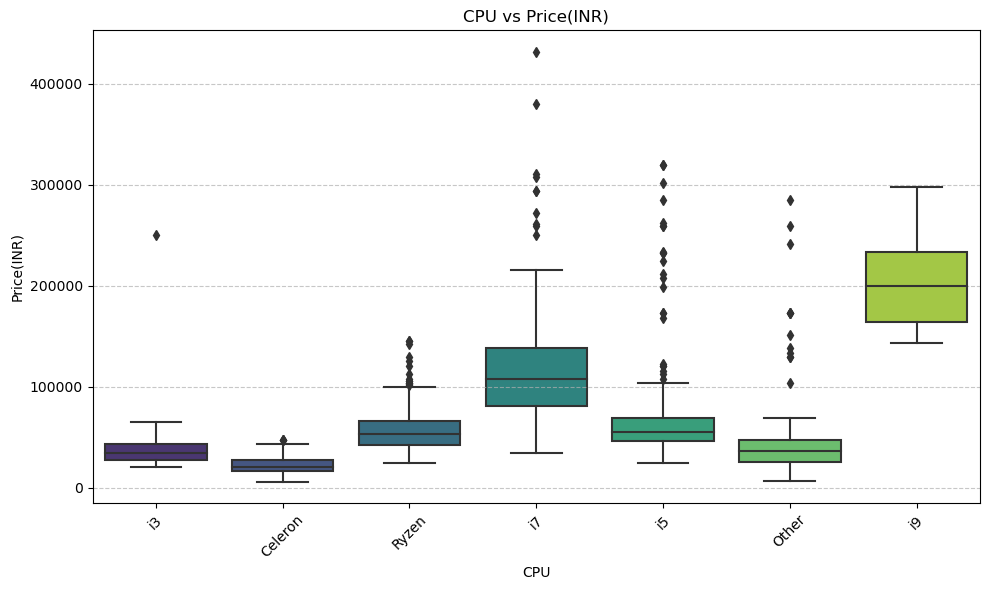

In [59]:
plot_categorical(df,'CPU')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          979 non-null    object 
 1   Screen_Size    979 non-null    float64
 2   Rating         979 non-null    float64
 3   Ram(GB)        979 non-null    float64
 4   Disk_Size(GB)  979 non-null    float64
 5   CPU            979 non-null    object 
 6   Price(INR)     979 non-null    float64
dtypes: float64(5), object(2)
memory usage: 53.7+ KB


## Model Building

In [61]:
dummies1=pd.get_dummies(df.Brand)
dummies2=pd.get_dummies(df.CPU)
df=pd.concat([df,dummies1.drop('Other',axis=1),dummies2.drop('Ryzen',axis=1)],axis=1)
df.drop(['Brand','CPU'],inplace=True,axis=1)
df

,Screen_Size,Rating,Ram(GB),Disk_Size(GB),Price(INR),ASUS,Acer,Alienware,Dell,EXCaliberPC,...,Microsoft,Panasonic,SAMSUNG,Toughbook,Celeron,Other,i3,i5,i7,i9
0,15.6,4.400000,8.0,128.0,25892.1369,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,15.6,4.200000,4.0,256.0,25892.1369,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,14.0,4.300000,8.0,512.0,75952.8000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.6,4.500000,8.0,512.0,76901.3469,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,15.6,4.600000,8.0,512.0,53079.7869,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,14.0,4.200000,8.0,512.0,232173.0369,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
975,14.0,4.284559,16.0,512.0,258929.1369,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
976,13.1,3.000000,4.0,320.0,211458.6369,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
977,12.0,3.800000,8.0,256.0,319260.6900,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [62]:
df.shape

(979, 25)

In [63]:
X=df.drop('Price(INR)',axis=1)
X.head()

,Screen_Size,Rating,Ram(GB),Disk_Size(GB),ASUS,Acer,Alienware,Dell,EXCaliberPC,GIGABYTE,...,Microsoft,Panasonic,SAMSUNG,Toughbook,Celeron,Other,i3,i5,i7,i9
0,15.6,4.4,8.0,128.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,15.6,4.2,4.0,256.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,14.0,4.3,8.0,512.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.6,4.5,8.0,512.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,15.6,4.6,8.0,512.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
y=df['Price(INR)']
y.head()

0    25892.1369
1    25892.1369
2    75952.8000
3    76901.3469
4    53079.7869
Name: Price(INR), dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression

lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8093888624026407

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84039432, 0.82714378, 0.82574667, 0.7408429 , 0.83244838])

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

def find_best_model(X,y):
    algos={"Linear Regression": {'model':LinearRegression(),'params':{'normalize':[True,False]}},
    "XGBoost": {'model': XGBRegressor(random_state=42), 'params':{
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
    }},
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
    for algo,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({'model':algo,'best_score':gs.best_score_,'best_params':gs.best_params_})
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
acc=find_best_model(X,y)
acc

,model,best_score,best_params
0,Linear Regression,0.813112,{'normalize': True}
1,XGBoost,0.818660,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti..."


In [69]:
acc.iloc[1].best_params

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

In [70]:
xgr=XGBRegressor(learning_rate=0.2,max_depth=4,n_estimators=200,random_state=42)
xgr.fit(X_train,y_train)
xgr.score(X_test,y_test)

0.7970020880096541

In [71]:
X.head()

,Screen_Size,Rating,Ram(GB),Disk_Size(GB),ASUS,Acer,Alienware,Dell,EXCaliberPC,GIGABYTE,...,Microsoft,Panasonic,SAMSUNG,Toughbook,Celeron,Other,i3,i5,i7,i9
0,15.6,4.4,8.0,128.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,15.6,4.2,4.0,256.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,14.0,4.3,8.0,512.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.6,4.5,8.0,512.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,15.6,4.6,8.0,512.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
def predict_price(model,brand,cpu,screen_size,ram,disk_size,rating=3.5):
    brand_index=np.where(X.columns==brand)[0][0]
    cpu_index=np.where(X.columns==cpu)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=screen_size
    x[1]=rating
    x[2]=ram
    x[3]=disk_size
    if brand_index>=0:
        x[brand_index]=1
    if cpu_index>=0:
        x[cpu_index]=1
    return model.predict([x])[0]

In [76]:
predict_price(lr_clf,'HP','i7',15.1,8,256)

63841.17392992406

In [79]:
import pickle
with open('laptop_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [80]:
import json
columns= {'data_columns':[col.lower() for col in X.columns]}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))